In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

plt.rcParams['figure.figsize'] = (25, 19)
plt.rcParams['font.size'] = 13
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("store.csv")
df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [3]:
train_df = pd.read_csv("train.csv", low_memory=False)

In [4]:
test_df = pd.read_csv("test.csv")

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [9]:
df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
merged_df = train_df.merge(df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
merged_test = test_df.merge(df, how='left', on='Store')

#### Cleaning data

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [13]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [14]:
training_cols = list(merged_df.columns[merged_df.columns.isin(merged_test.columns)])
training_cols

['Store',
 'DayOfWeek',
 'Date',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [15]:
np.all(merged_df.isin(merged_test), axis=1).value_counts()

False    1017209
dtype: int64

In [16]:
merged_df.duplicated().sum()

0

In [17]:
merged_test.duplicated().sum()

0

In [18]:
merged_df[training_cols].describe()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [19]:
merged_df[training_cols]

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [20]:
round(merged_test.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Id,41088.0,20544.50,11861.23,1.0,10272.75,20544.5,30816.25,41088.0
Store,41088.0,555.90,320.27,1.0,279.75,553.5,832.25,1115.0
DayOfWeek,41088.0,3.98,2.02,1.0,2.00,4.0,6.00,7.0
Open,41077.0,0.85,0.35,0.0,1.00,1.0,1.00,1.0
Promo,41088.0,0.40,0.49,0.0,0.00,0.0,1.00,1.0
SchoolHoliday,41088.0,0.44,0.50,0.0,0.00,0.0,1.00,1.0
CompetitionDistance,40992.0,5088.58,7225.49,20.0,720.00,2425.0,6480.00,75860.0
CompetitionOpenSinceMonth,25872.0,7.04,3.14,1.0,4.00,7.0,9.00,12.0
CompetitionOpenSinceYear,25872.0,2008.64,6.86,1900.0,2006.00,2010.0,2012.00,2015.0
Promo2,41088.0,0.58,0.49,0.0,0.00,1.0,1.00,1.0


In [21]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [22]:
merged_test['Date'] = pd.to_datetime(merged_test['Date'])

In [23]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [24]:
merged_test.Date.min(), merged_test.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

### Exploratory Data Analysis and Visualization
- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies of errors in the data (e.g missing/incorrect values)
- Study the relationship or target column with other columns (linea or non-linear columns)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering

<Axes: xlabel='Sales', ylabel='Count'>

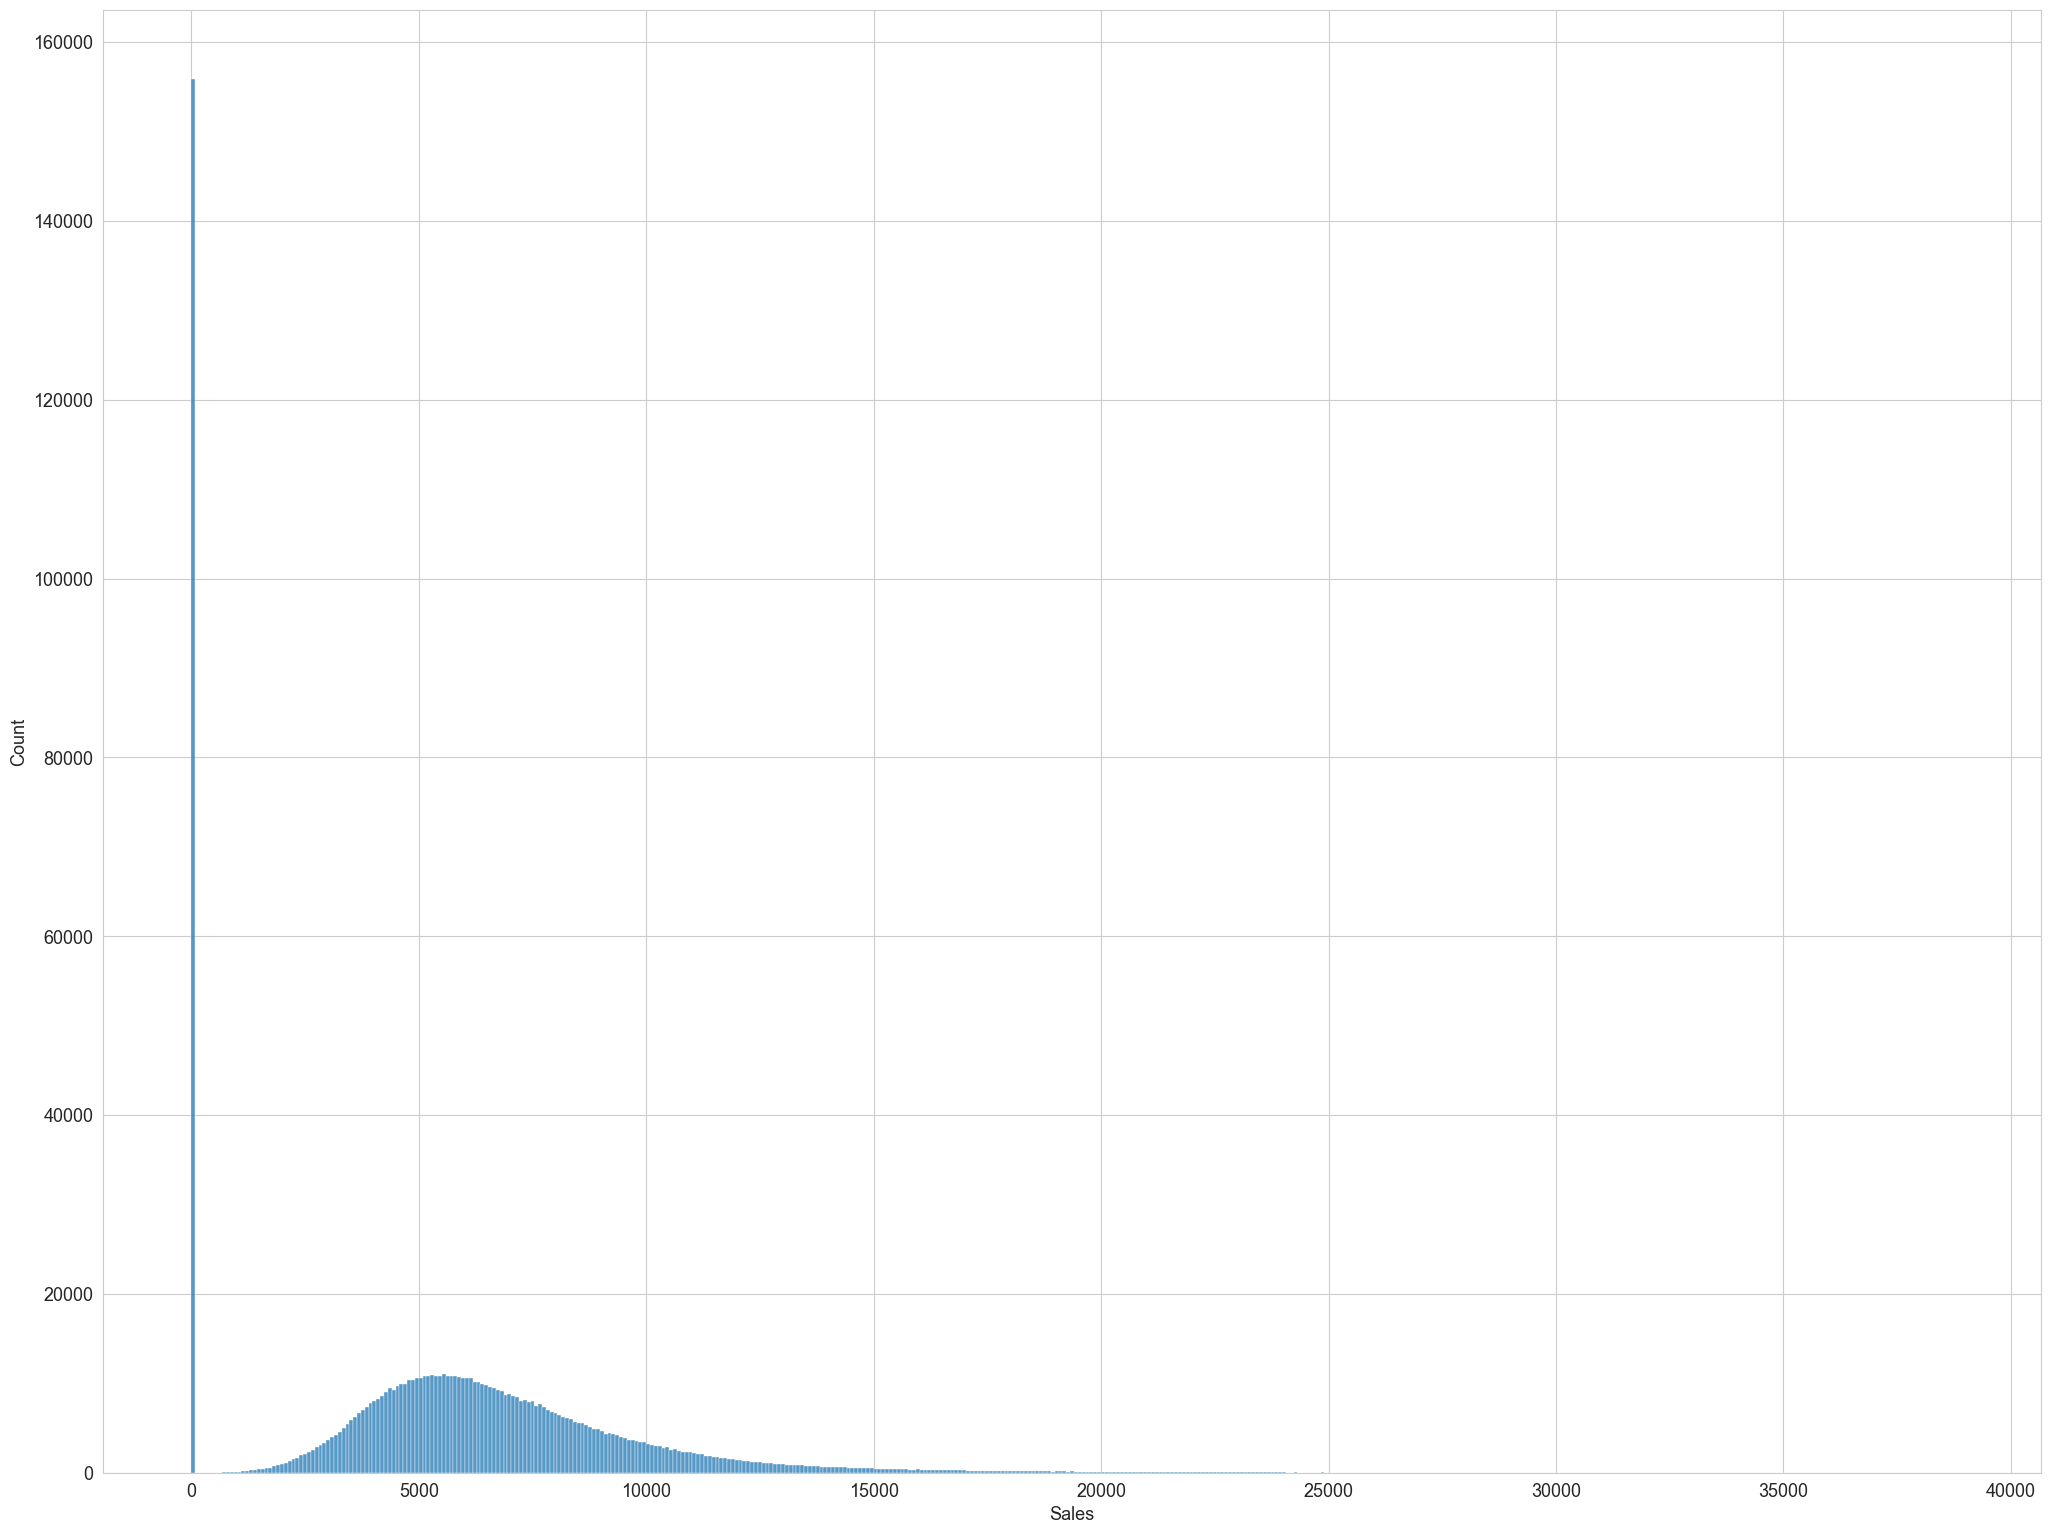

In [25]:
sns.histplot(data=merged_df[101500:1017209], x='Sales')

In [26]:
merged_df.count()

Store                        1017209
DayOfWeek                    1017209
Date                         1017209
Sales                        1017209
Customers                    1017209
Open                         1017209
Promo                        1017209
StateHoliday                 1017209
SchoolHoliday                1017209
StoreType                    1017209
Assortment                   1017209
CompetitionDistance          1014567
CompetitionOpenSinceMonth     693861
CompetitionOpenSinceYear      693861
Promo2                       1017209
Promo2SinceWeek               509178
Promo2SinceYear               509178
PromoInterval                 509178
dtype: int64

In [27]:
merged_df[merged_df['Sales'] == 0]["Sales"].count()

172871

In [28]:
merged_df = merged_df[merged_df['Open'] ==1].copy()

In [29]:
merged_df["Sales"]

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 844392, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

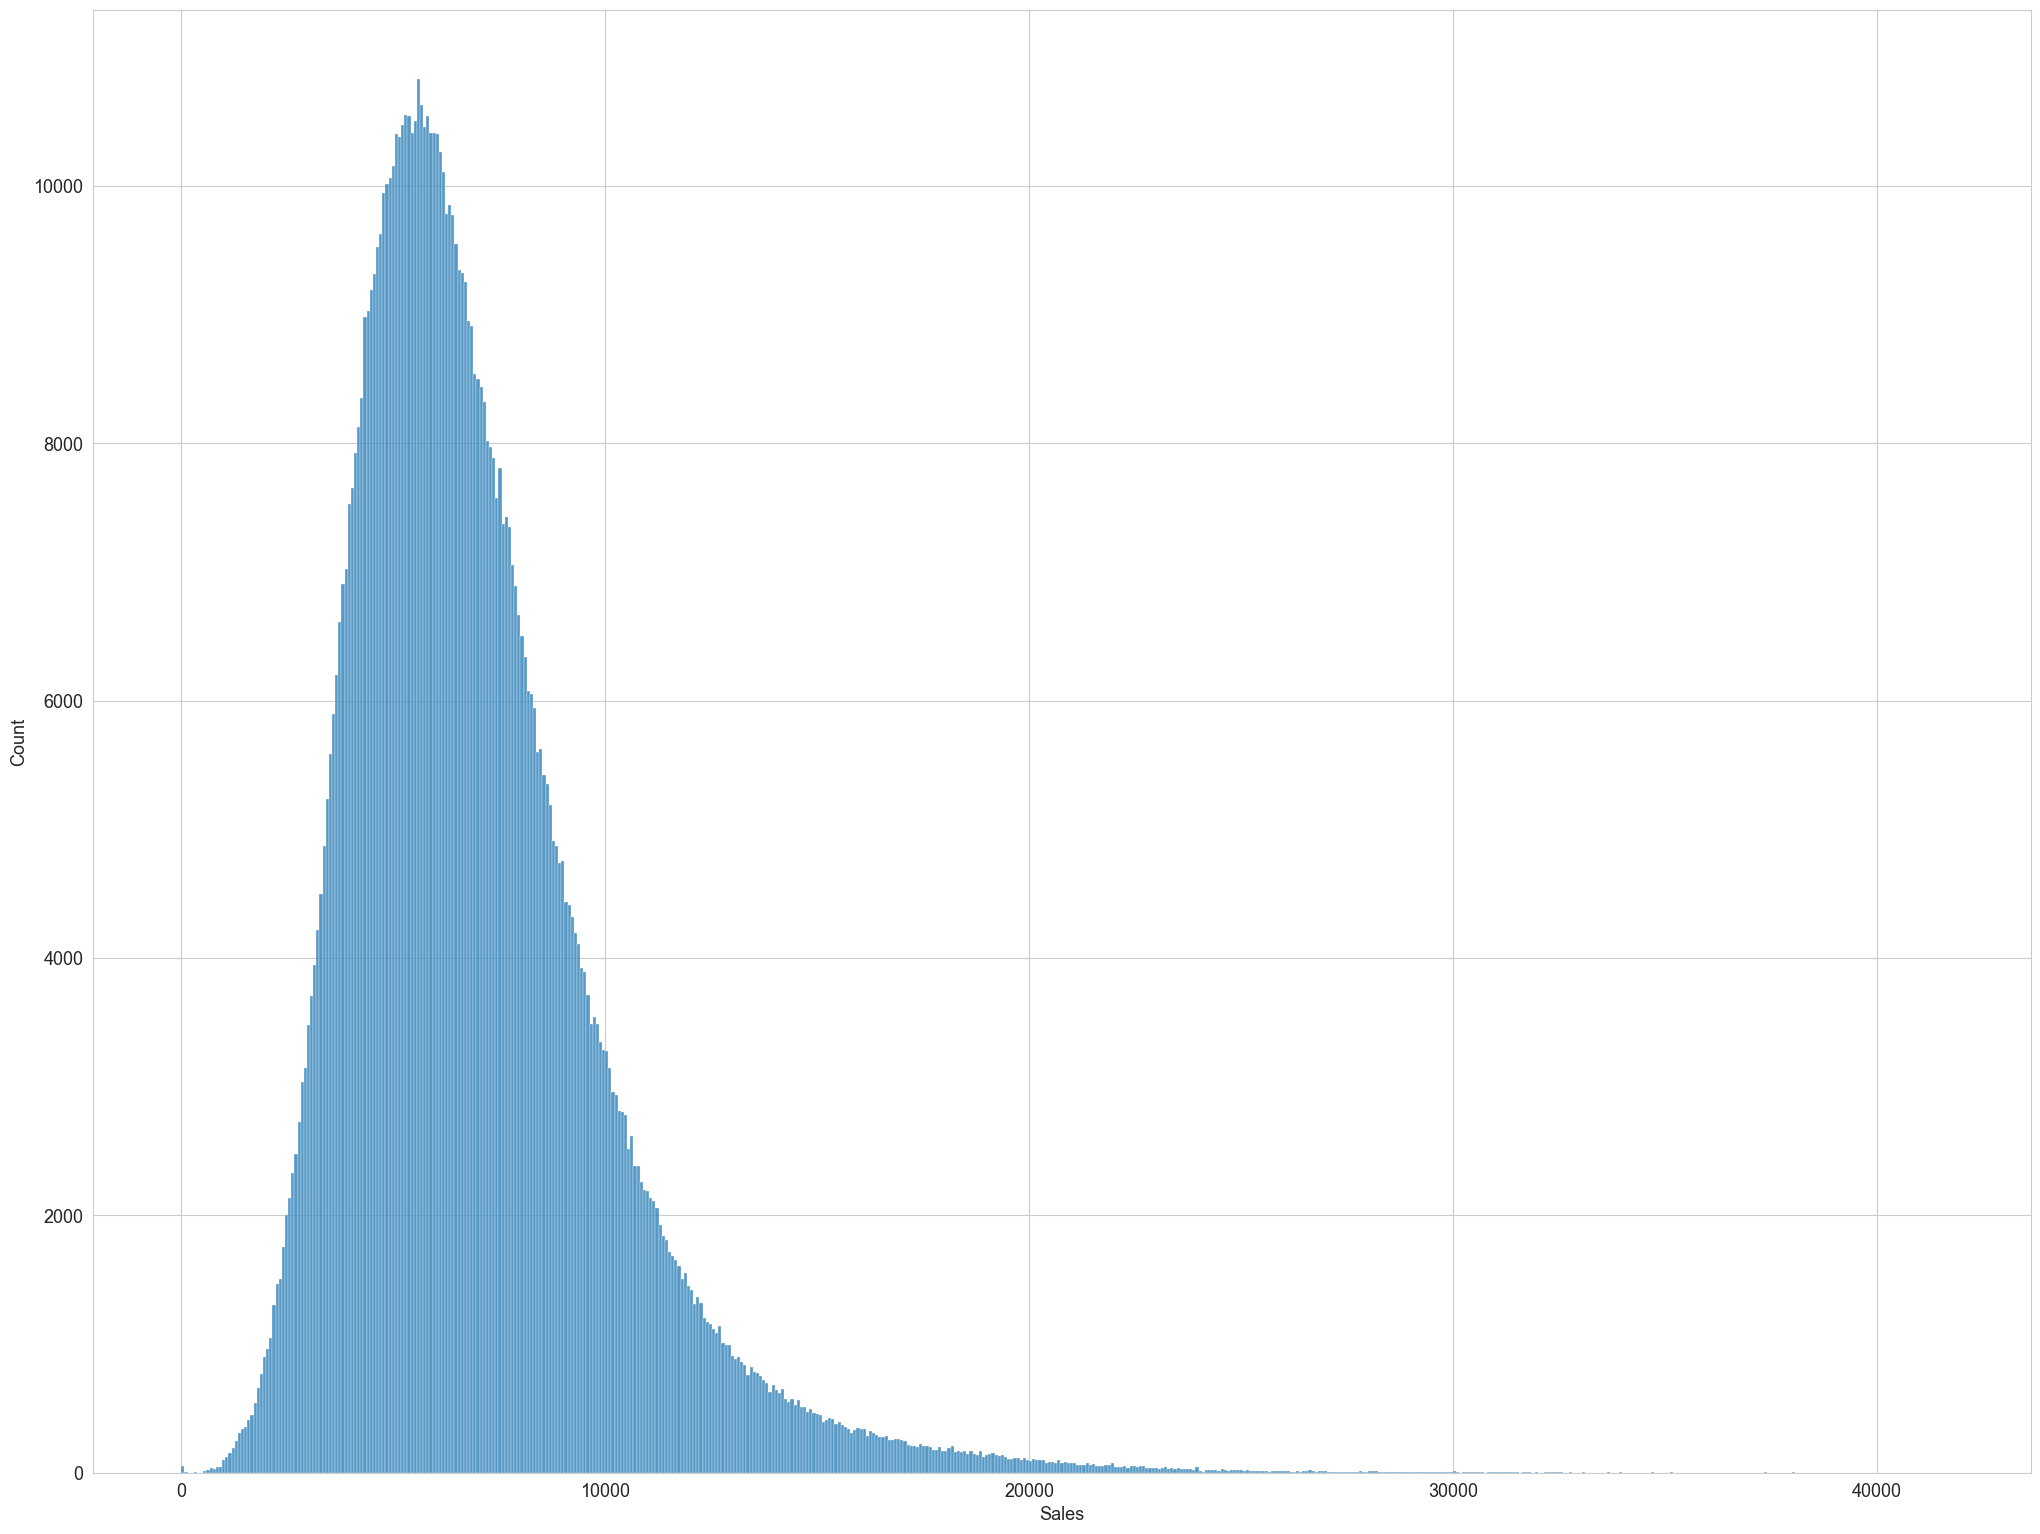

In [30]:
sns.histplot(data=merged_df, x='Sales')

<Axes: xlabel='Sales', ylabel='Count'>

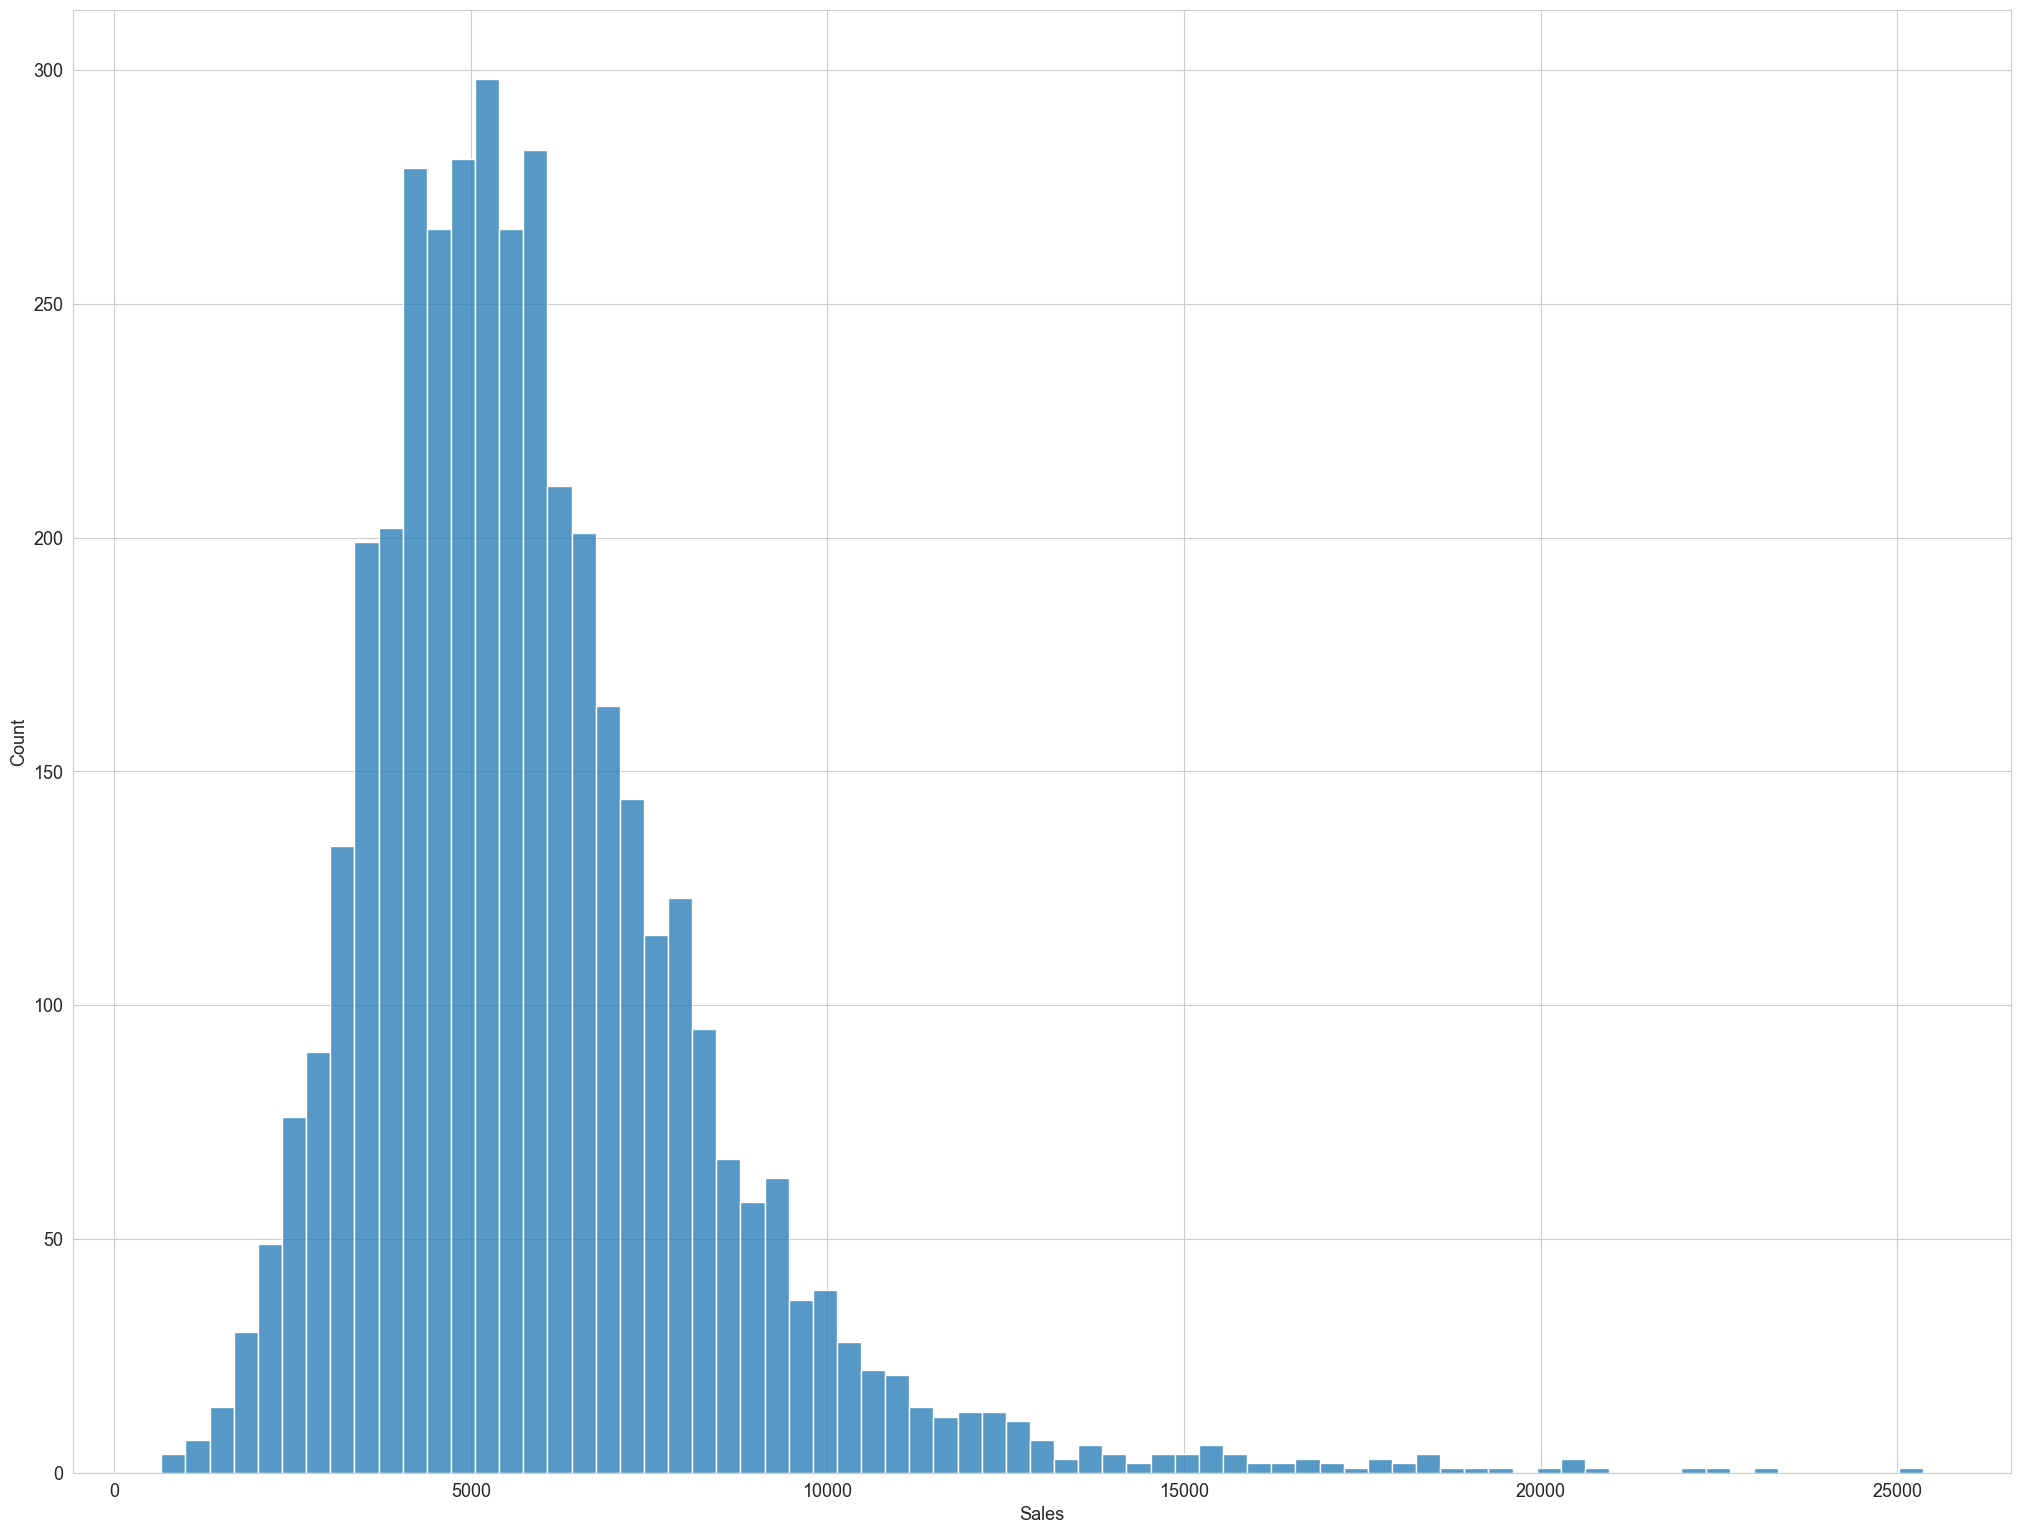

In [31]:
sns.histplot(data=merged_df[840392:844392], x='Sales')

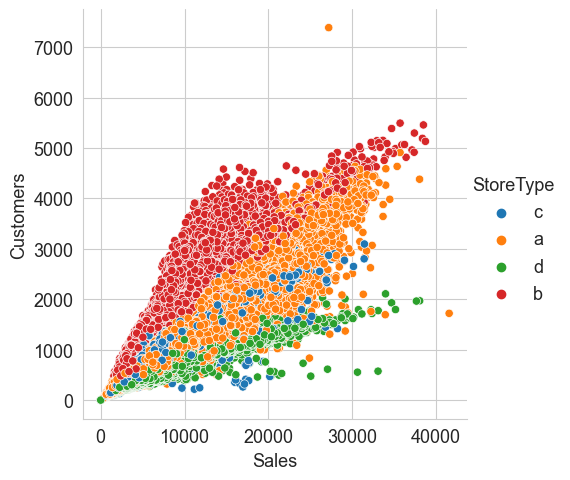

In [32]:
sns.relplot(merged_df, x='Sales', y='Customers', hue='StoreType')

<Axes: xlabel='Customers', ylabel='Count'>

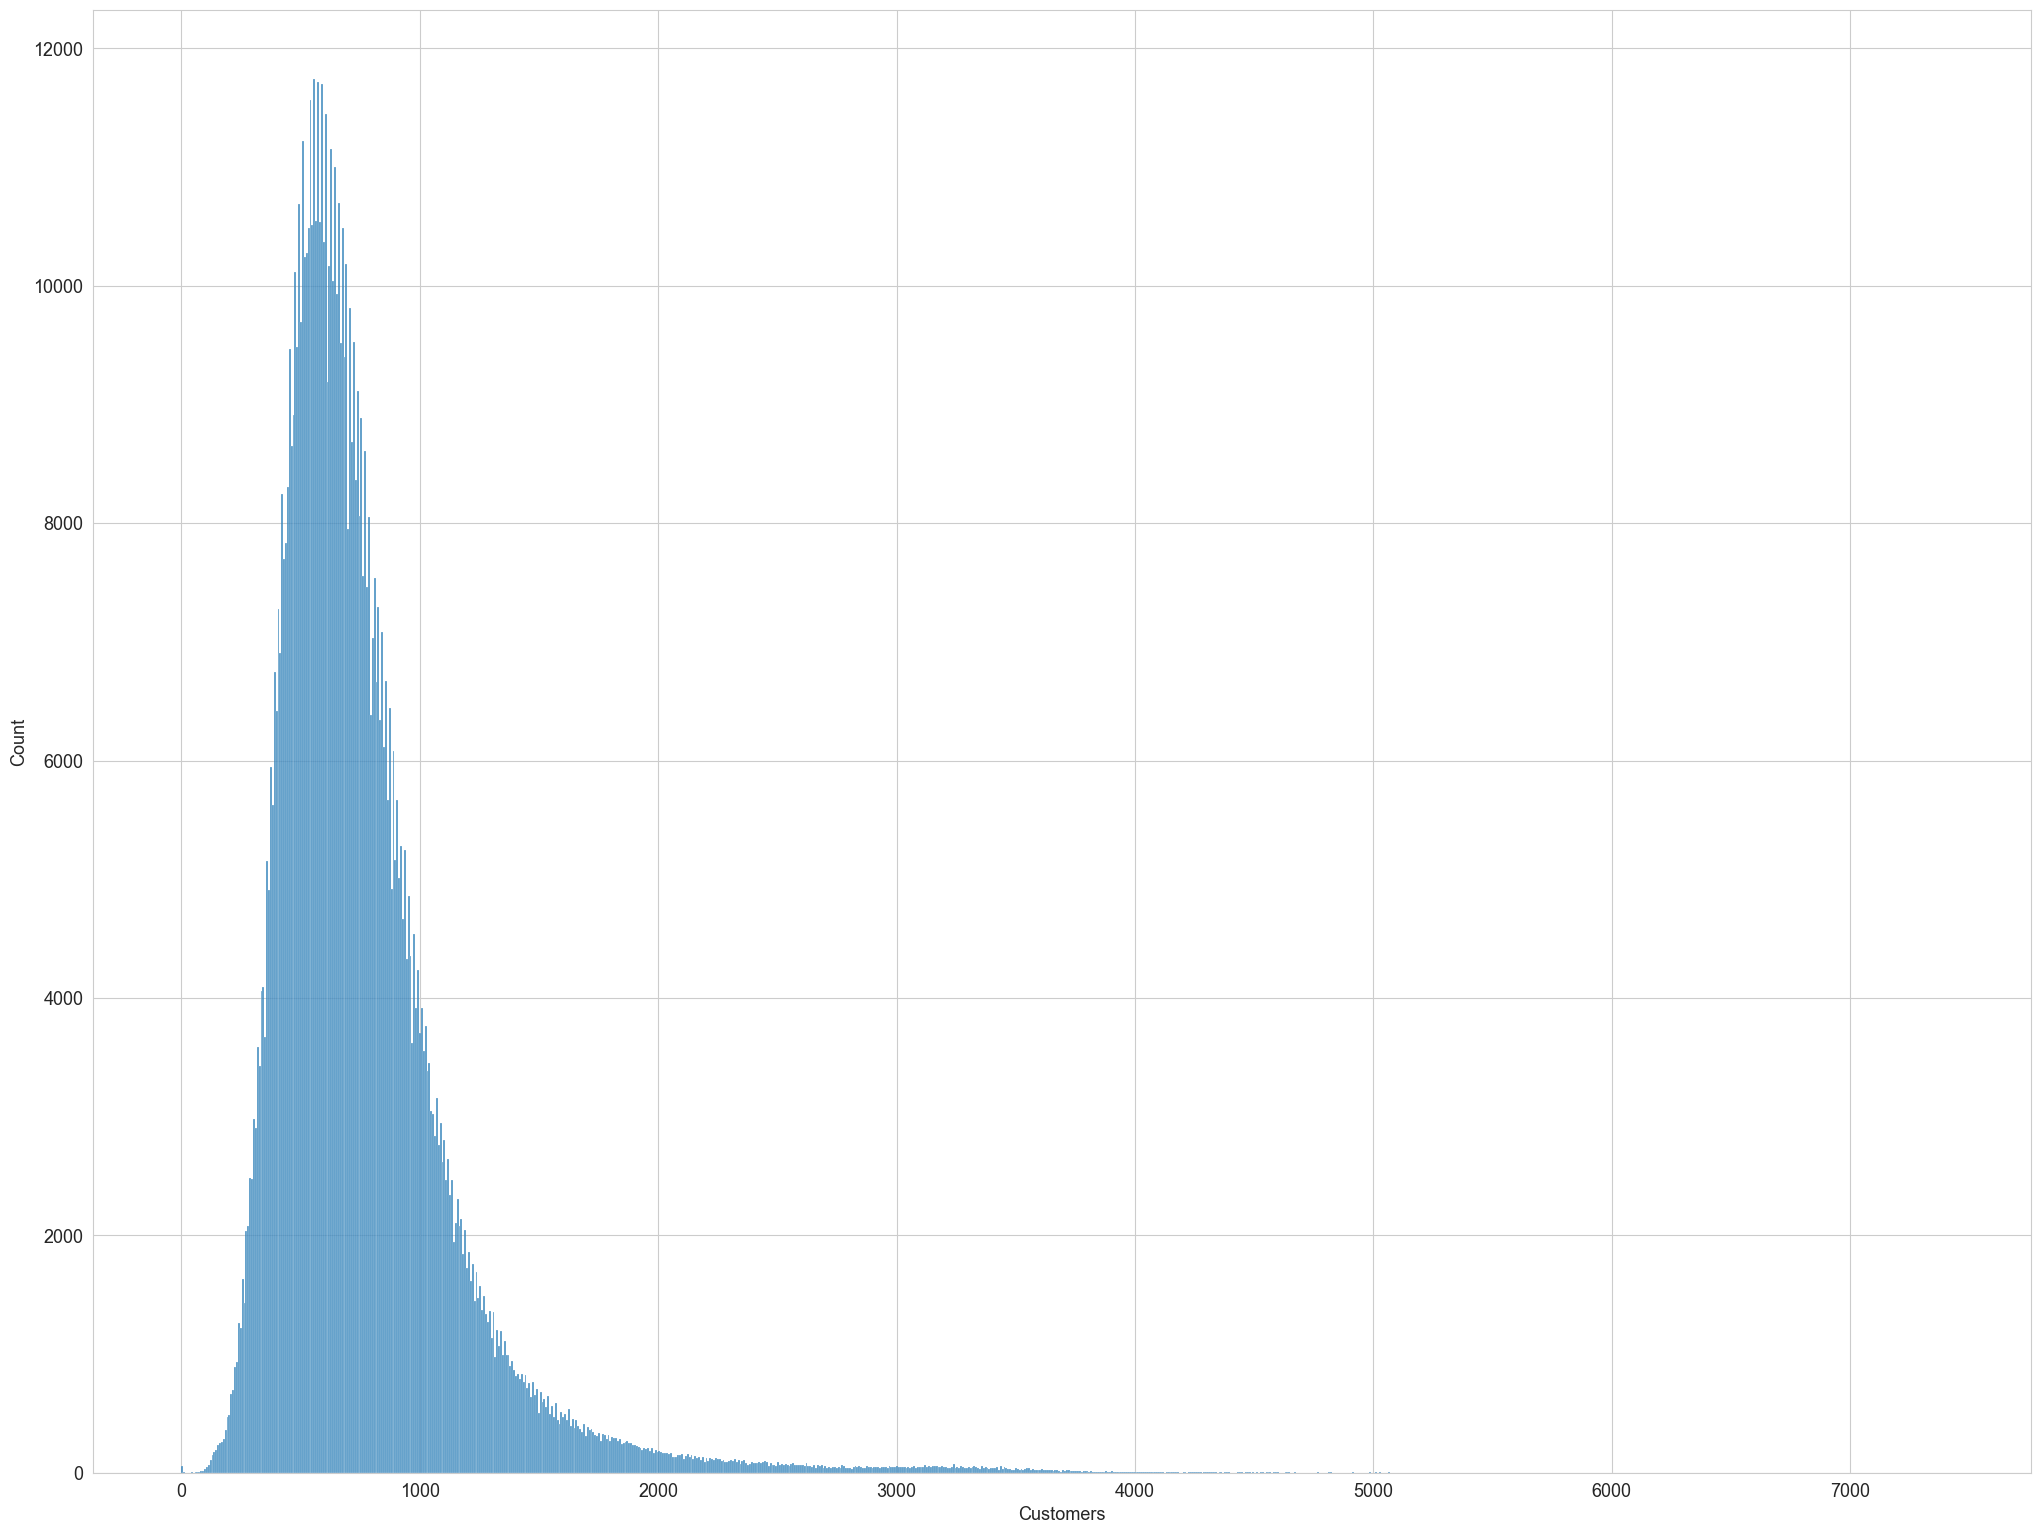

In [122]:
sns.histplot(merged_df['Customers'])

<Axes: xlabel='Customers', ylabel='Count'>

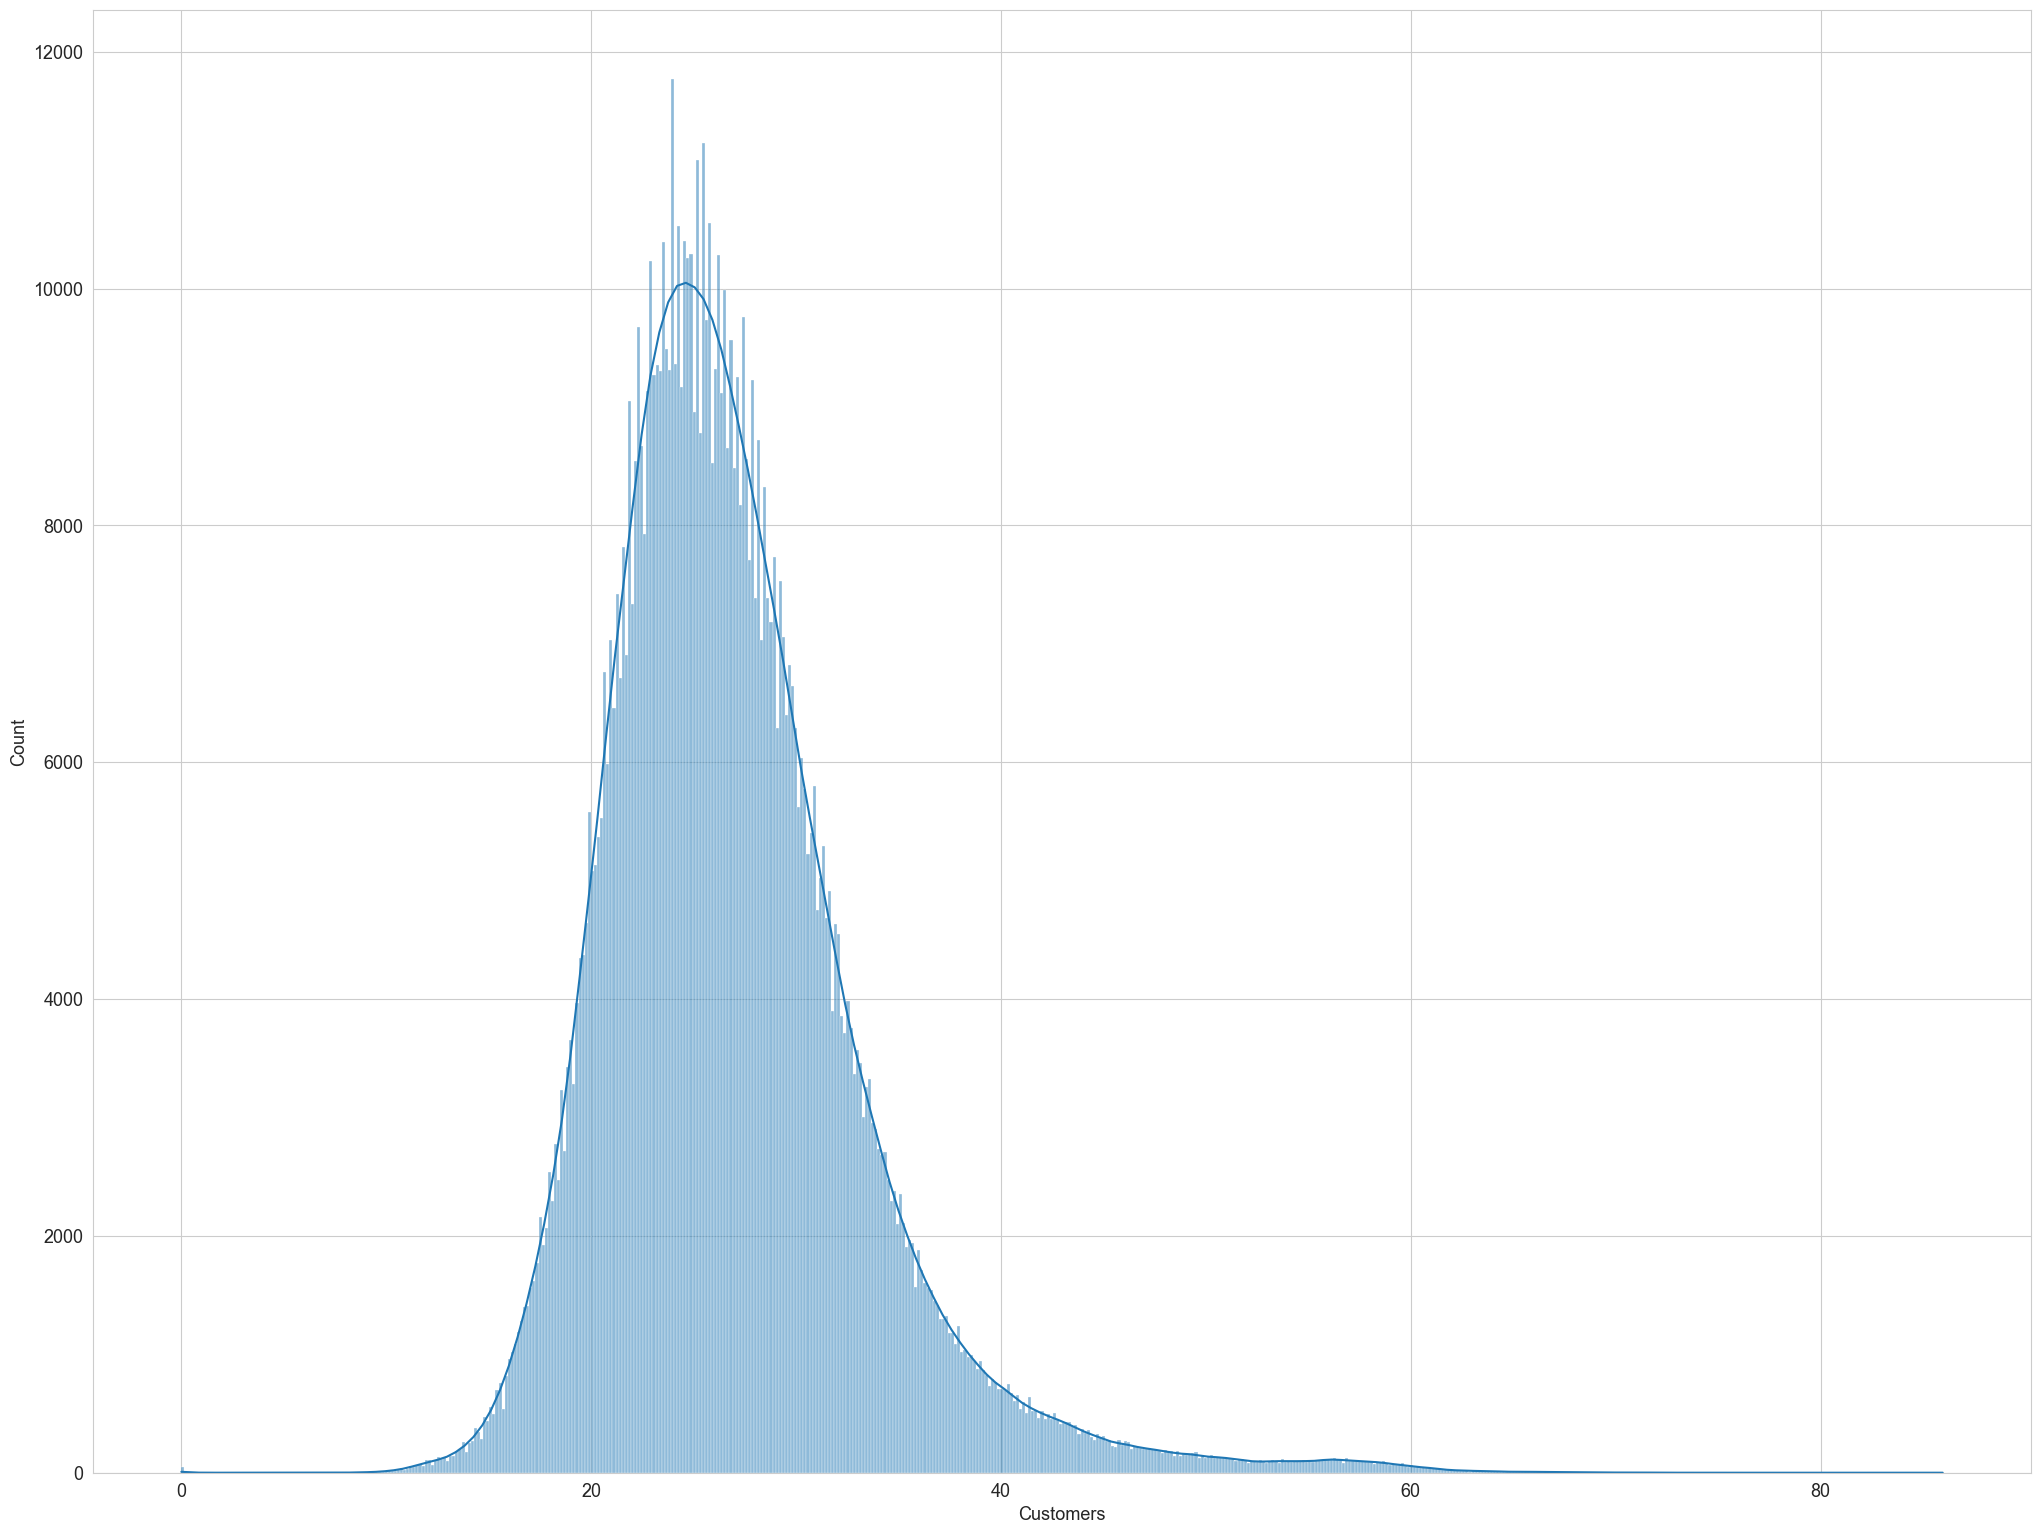

In [123]:
sns.histplot(np.sqrt(merged_df['Customers']), kde=True)

<Axes: xlabel='Customers', ylabel='Count'>

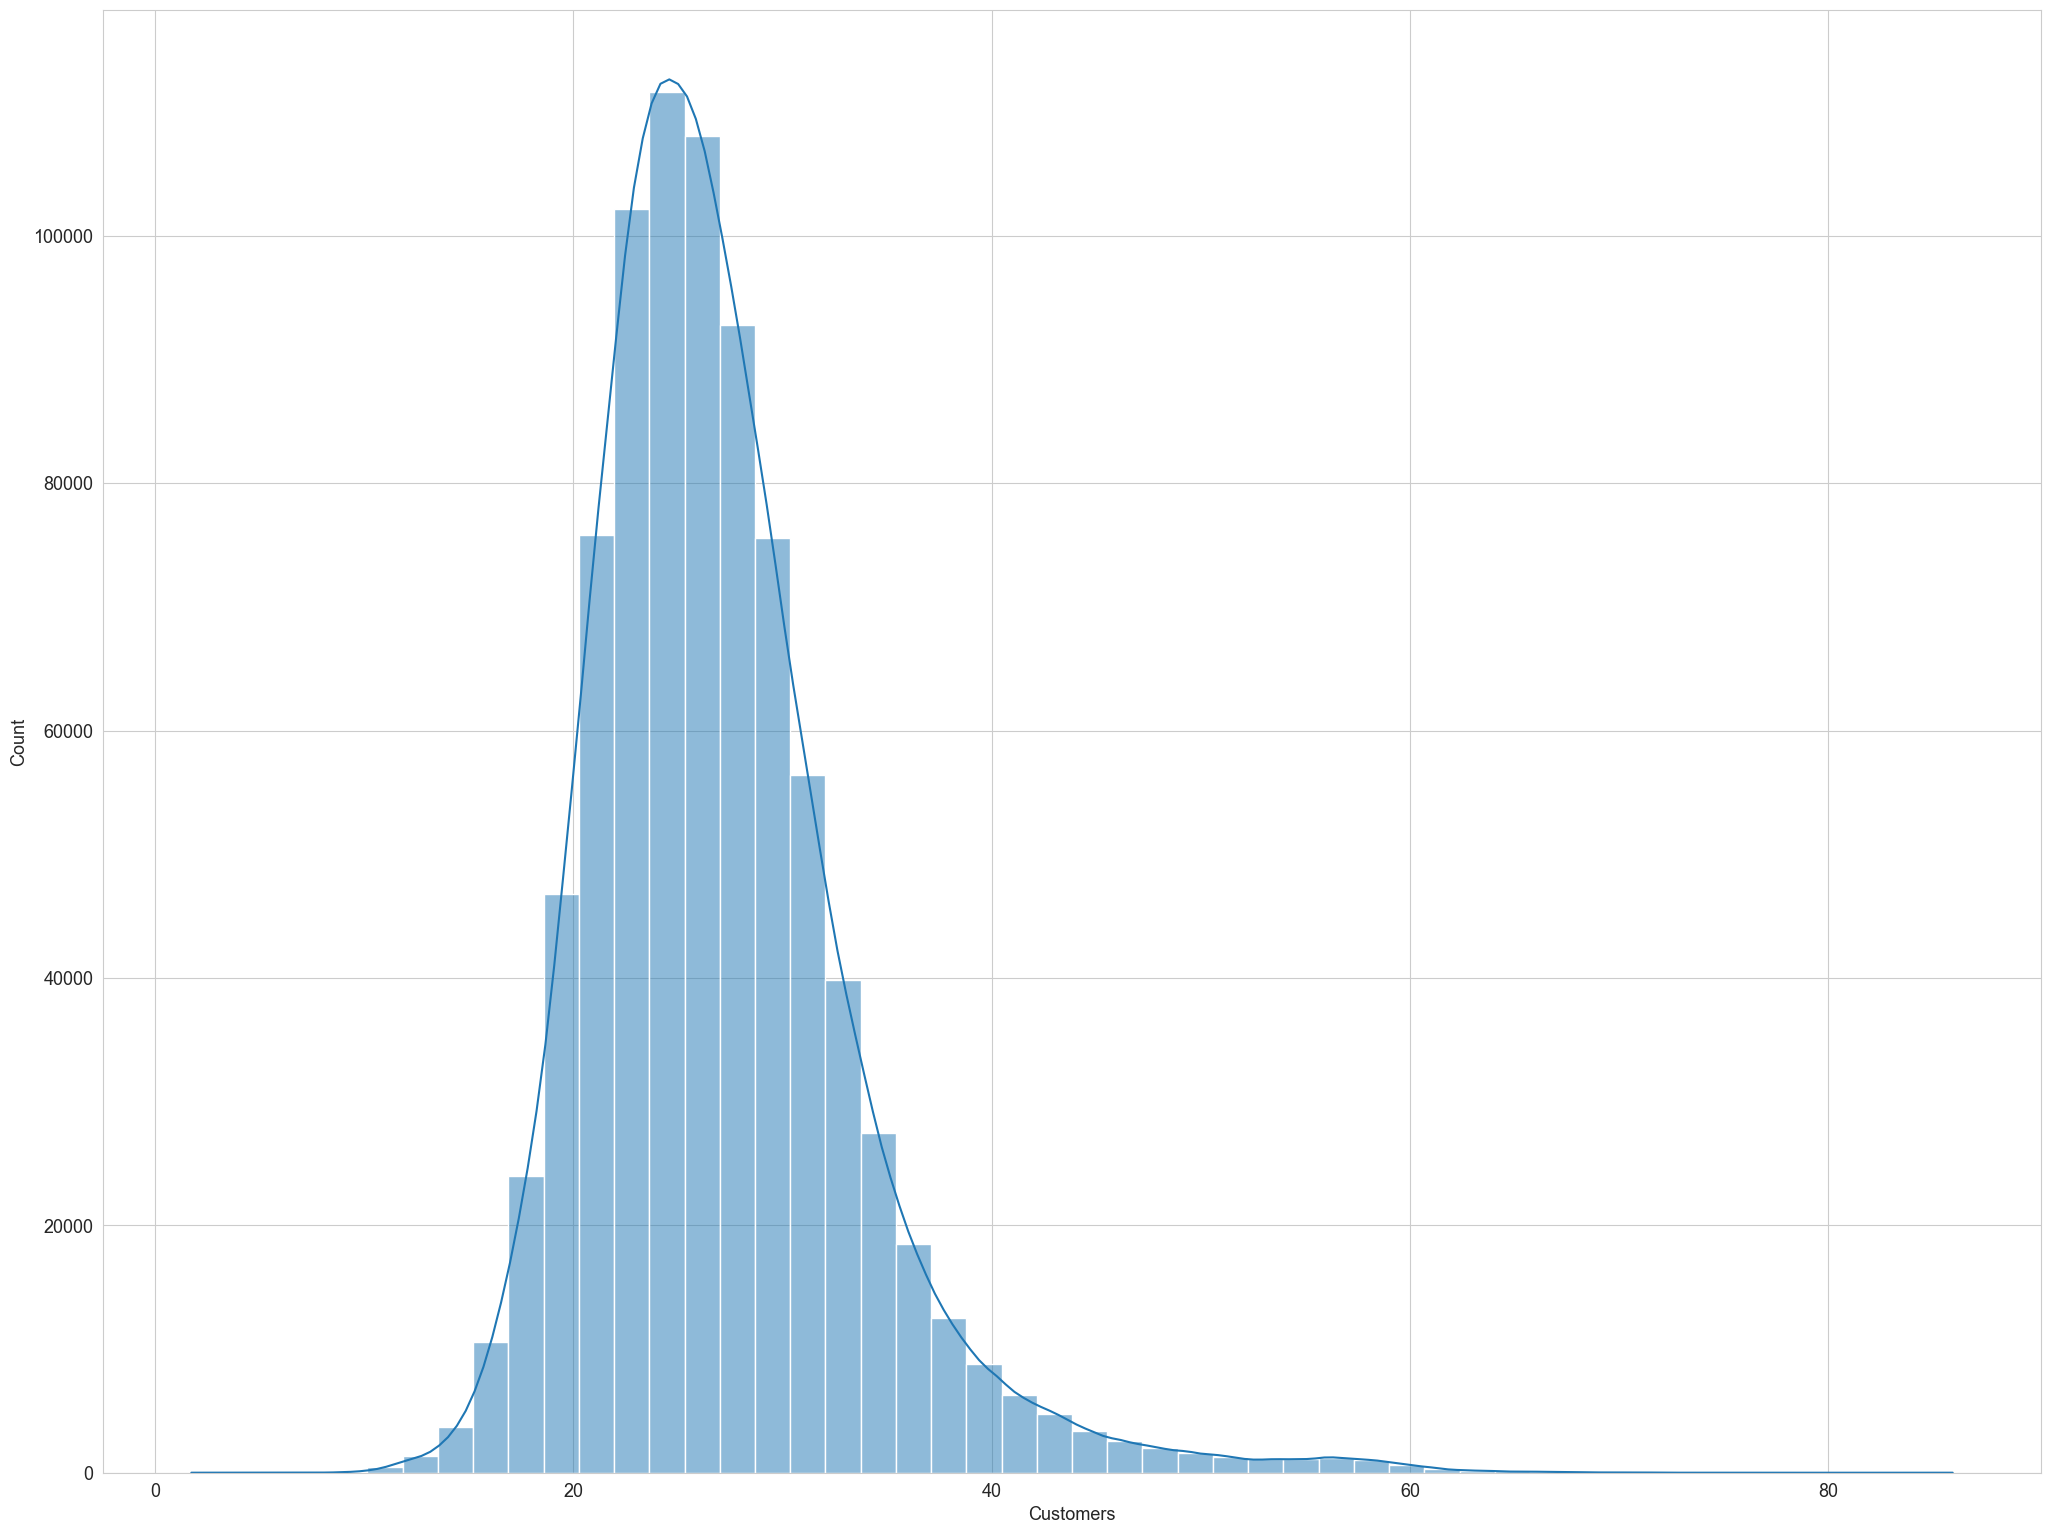

In [145]:
customers_ = merged_df[merged_df['Customers'] != 0]['Customers']
sns.histplot(np.sqrt(customers_), kde=True, bins=50)


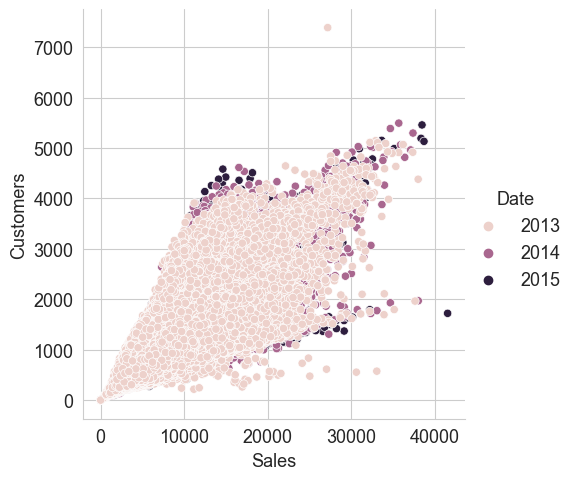

In [33]:
sns.relplot(x=merged_df.Sales, y=merged_df.Customers, hue=merged_df.Date.dt.year)

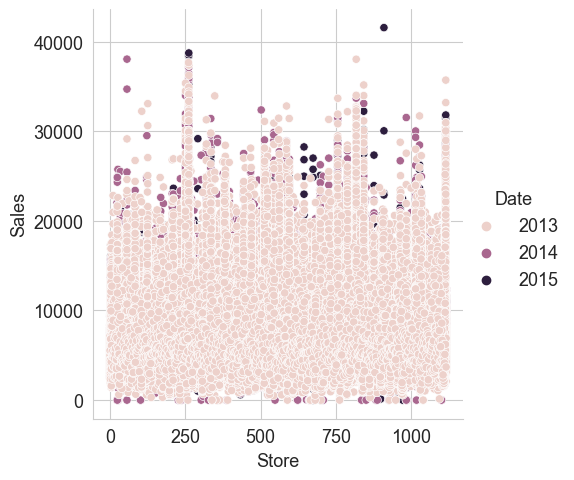

In [34]:
sns.relplot(x=merged_df.Store, y=merged_df.Sales, hue=merged_df.Date.dt.year)

In [35]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


<Axes: xlabel='CompetitionOpenSinceYear', ylabel='CompetitionOpenSinceYear'>

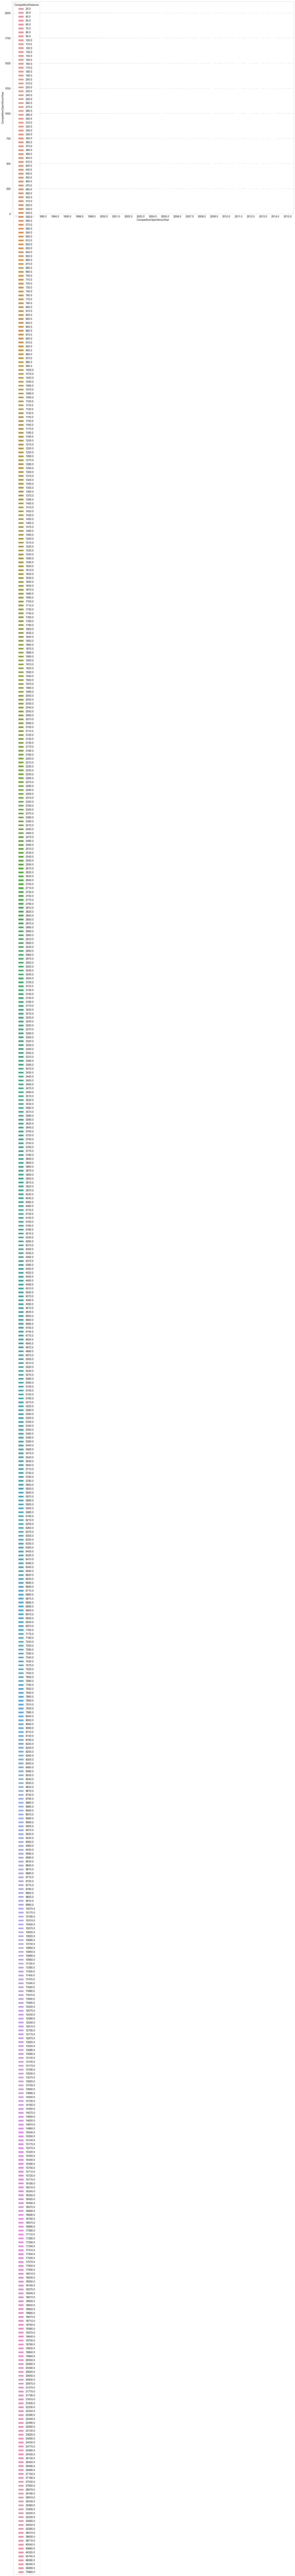

In [36]:
sns.barplot(x=merged_df.CompetitionOpenSinceYear, y=merged_df.CompetitionOpenSinceYear, hue=merged_df.CompetitionDistance)

In [37]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Year'] = merged_df.Date.dt.year
merged_df['Weekday'] = merged_df.Date.dt.weekday
merged_df['Month'] = merged_df.Date.dt.month

In [38]:
merged_test['Day'] = merged_test.Date.dt.day
merged_test['Year'] = merged_test.Date.dt.year
merged_test['Weekday'] = merged_test.Date.dt.weekday
merged_test['Month'] = merged_test.Date.dt.month

In [39]:
len(merged_df['Day'].unique())

31

In [40]:
len(merged_df['Year'].unique())

3

In [41]:
len(merged_df['Weekday'].unique())

7

In [42]:
len(merged_df['Month'].unique())

12

<Axes: xlabel='Sales', ylabel='Month'>

In [50]:
len(merged_df)

844392

In [51]:
train_size = int(0.75 * len(merged_df))
train_size

633294

In [52]:
sorted_df = merged_df.sort_values("Date")

In [53]:
sorted_df
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [54]:
input_cols = merged_df.columns
input_cols

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Year', 'Weekday', 'Month'],
      dtype='object')

In [61]:
b = train_df['Promo2SinceYear'].isnull() * 1

In [62]:
b

1017190    1
1016179    1
1016353    1
1016356    1
1016368    0
          ..
256632     0
256642     0
256634     1
256633     0
256636     0
Name: Promo2SinceYear, Length: 633294, dtype: int32

In [63]:
train_df['Promo2SinceYear']

1017190       NaN
1016179       NaN
1016353       NaN
1016356       NaN
1016368    2013.0
            ...  
256632     2009.0
256642     2011.0
256634        NaN
256633     2011.0
256636     2015.0
Name: Promo2SinceYear, Length: 633294, dtype: float64

In [66]:
merged_df.select_dtypes(np.number)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Year,Weekday,Month
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,NaN,NaN,31,2015,4,7
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,31,2015,4,7
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,31,2015,4,7
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,NaN,NaN,31,2015,4,7
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,0,NaN,NaN,31,2015,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,3375,566,1,0,1,150.0,9.0,2006.0,0,NaN,NaN,1,2013,1,1
1016827,733,2,10765,2377,1,0,1,860.0,10.0,1999.0,0,NaN,NaN,1,2013,1,1
1016863,769,2,5035,1248,1,0,1,840.0,NaN,NaN,1,48.0,2012.0,1,2013,1,1
1017042,948,2,4491,1039,1,0,1,1430.0,NaN,NaN,0,NaN,NaN,1,2013,1,1
